In [ ]:
%pip install requests bs4 pandas matplotlib scikit-learn lxml html5lib

In [3]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Function to scrape player statistics from Basketball-Reference
def scrape_player_stats(player_name):
    url = f'https://www.basketball-reference.com/players/{player_name[0]}/{player_name}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract relevant statistics
    # Example: Points per game (PPG), Assists per game (APG), etc.
    # Modify as per the structure of the website you're scraping
    stats_table = soup.find('table', {'id': 'per_game'})
    stats_df = pd.read_html(str(stats_table))[0]
    
    return stats_df


In [1]:


def create_plots(player, player_name):
  # Scrape player statistics
  player_stats = scrape_player_stats(player_name)
  # print(player_stats)
  player_stats = player_stats.iloc[0:-5,]

  for i in range(len(player_stats)):
    player_stats.loc[i,'Season']= str(player_stats.loc[i,'Season'])[-2:]

  # Visualize performance metrics over time
  plt.figure(figsize=(10, 6))
  for col in ['PTS', 'AST', 'TRB']:  # Example metrics: Points, Assists, Rebounds
    plt.plot(player_stats['Season'], player_stats[col], label=col)

  plt.title(f'{player.capitalize()}\'s Performance Over Time')
  plt.xlabel('Season')
  plt.ylabel('Average Per Game')
  plt.legend()
  plt.show()

  # Prepare data for regression
  X = player_stats['Season'].str[:4].astype(int).values.reshape(-1, 1)
  y = player_stats['PTS'].values

  # PTS plots
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Build and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Visualize the regression line
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, label='Actual Points per Game')
  plt.plot(X, model.predict(X), label='Regression Line', color='red')
  plt.title(f'Points per Game Prediction for {player.capitalize()}')
  plt.xlabel('Season')
  plt.ylabel('Points per Game')
  plt.legend()
  plt.show()

  # Rebounds plots

  y = player_stats['TRB'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Build and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Visualize the regression line
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, label='Actual Rebounds per Game')
  plt.plot(X, model.predict(X), label='Regression Line', color='red')
  plt.title(f'Total Rebounds Prediction for {player.capitalize()}')
  plt.xlabel('Season')
  plt.ylabel('Rebounds per Game')
  plt.legend()
  plt.show()


  # Assists plots
  y = player_stats['AST'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Build and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Visualize the regression line
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, label='Actual Assists per Game')
  plt.plot(X, model.predict(X), label='Regression Line', color='red')
  plt.title(f'Assists per Game Prediction for {player.capitalize()}')
  plt.xlabel('Season')
  plt.ylabel('Assists per Game')
  plt.legend()
  plt.show()

  


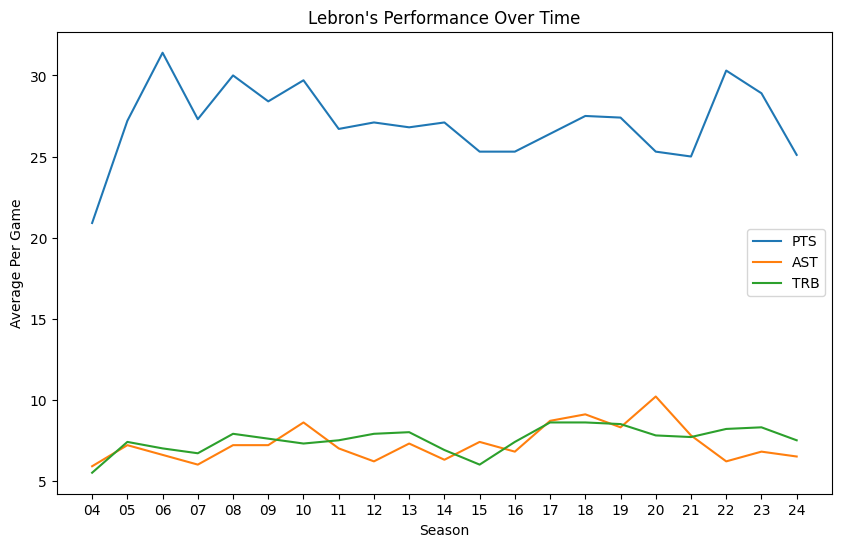

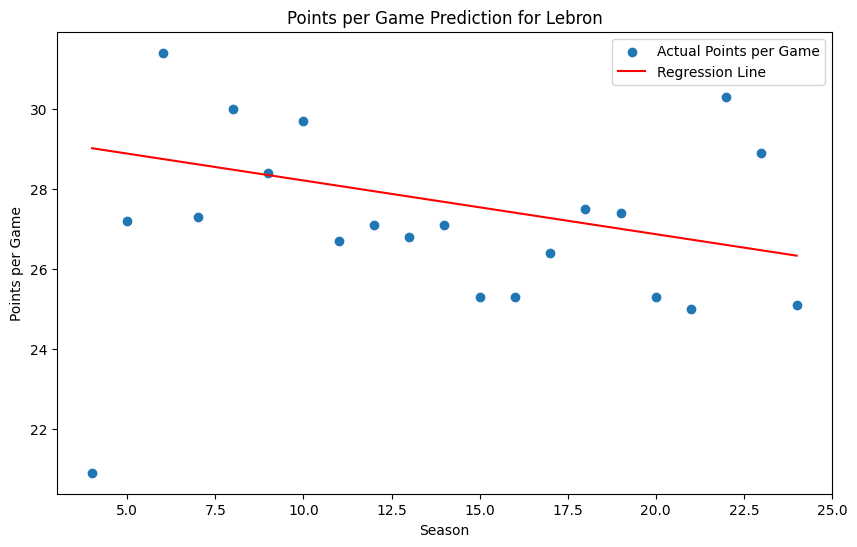

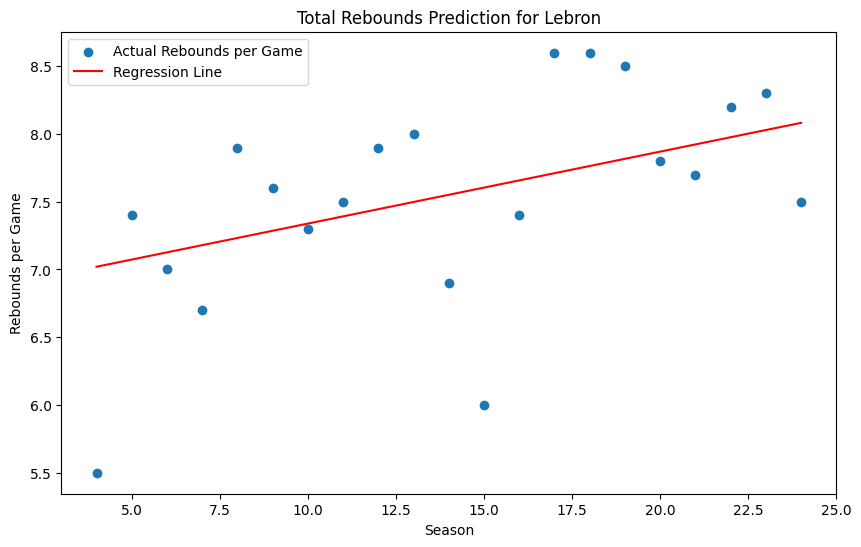

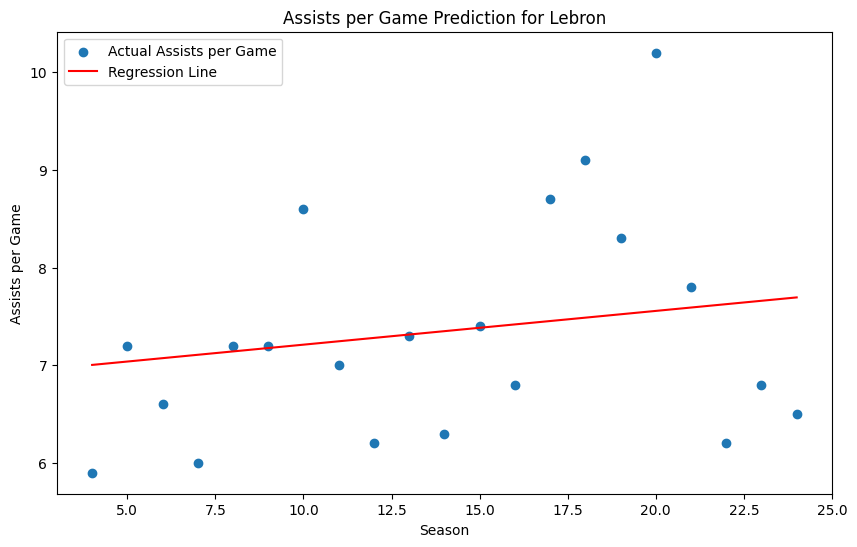

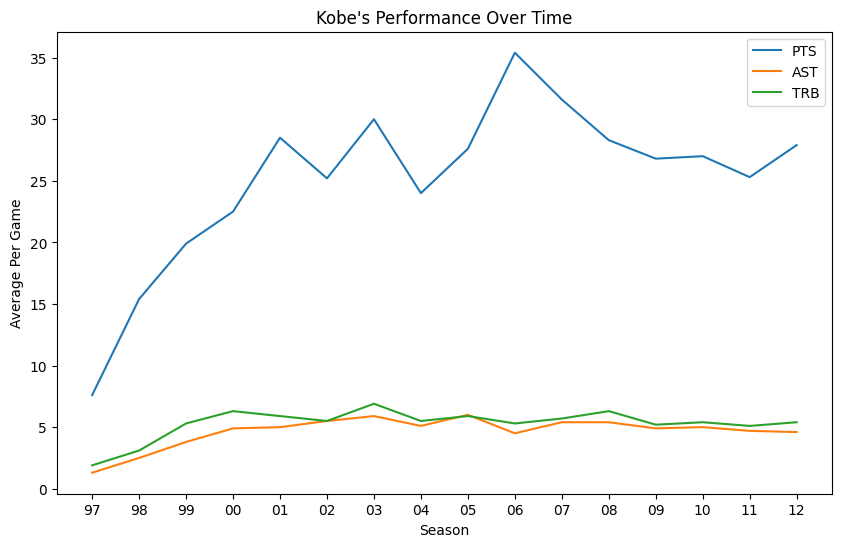

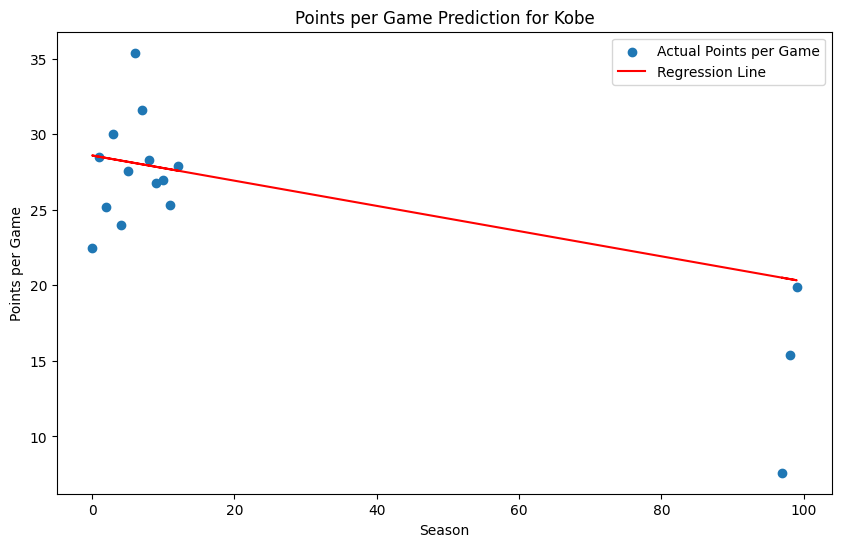

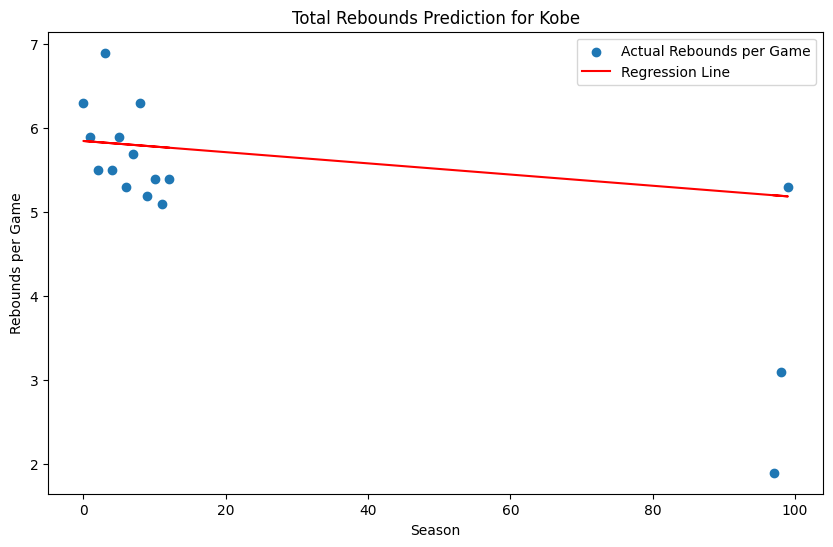

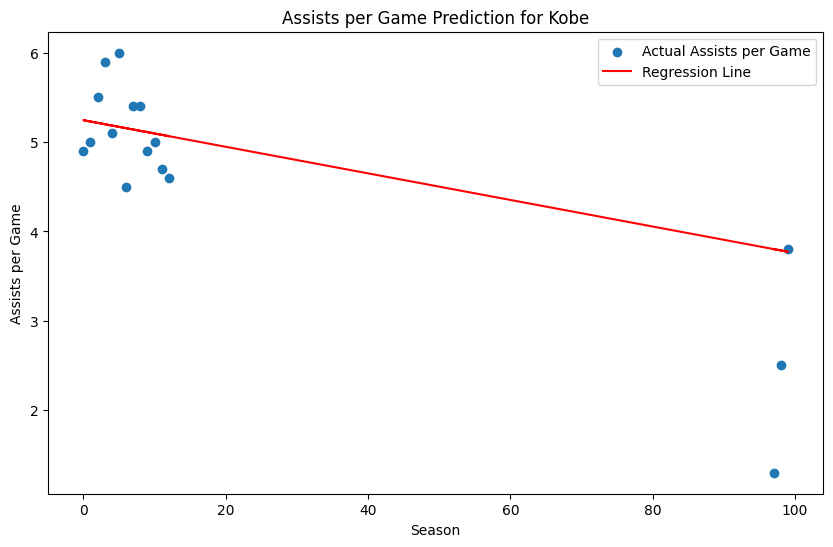

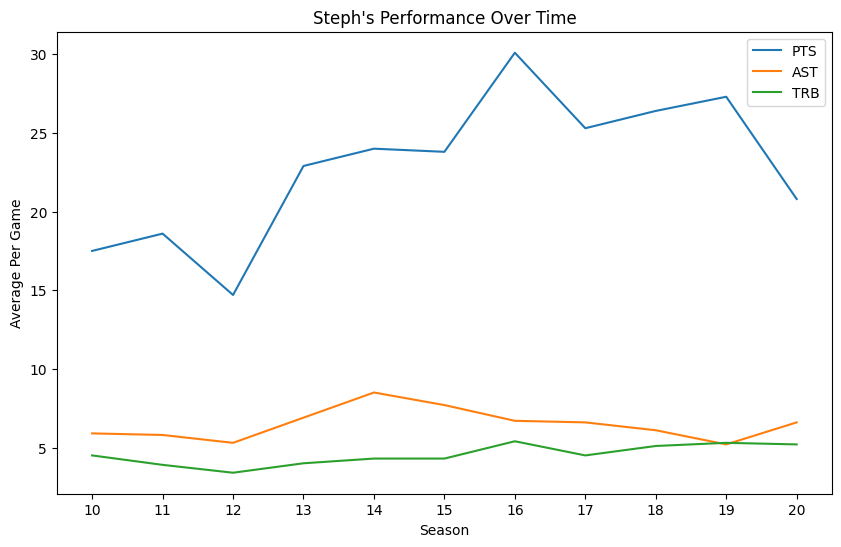

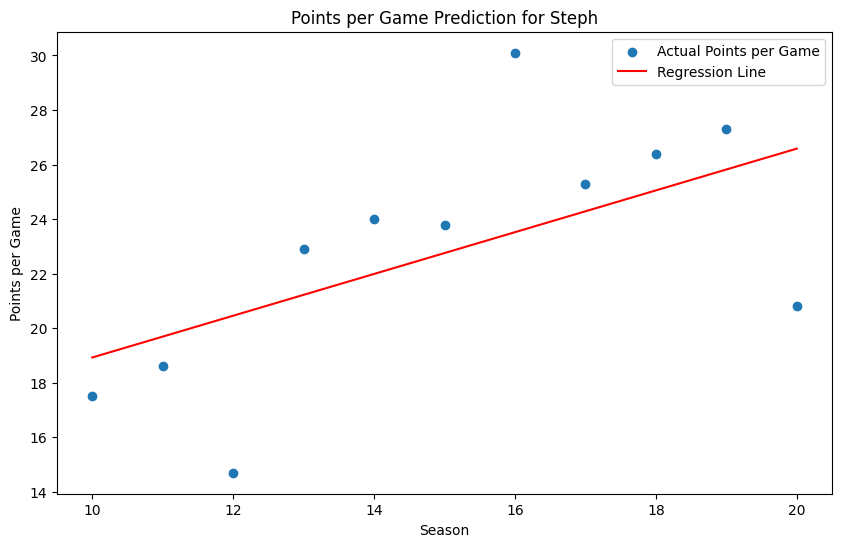

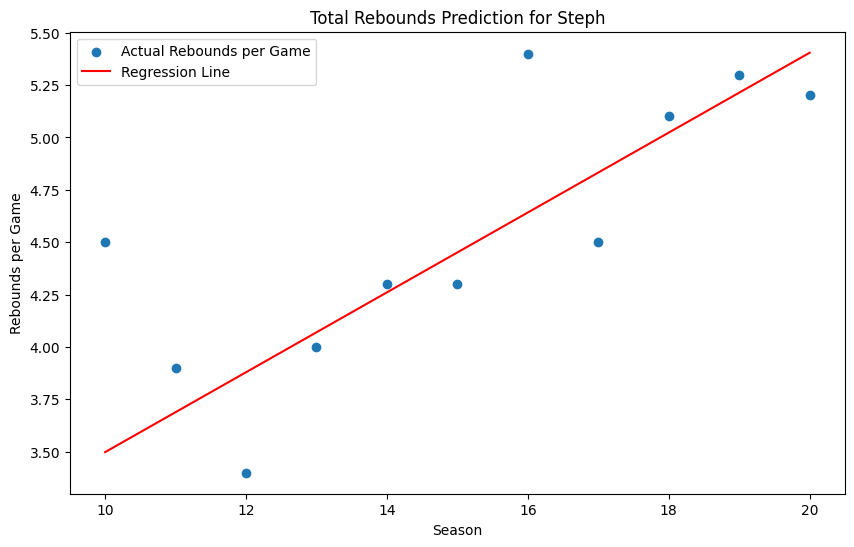

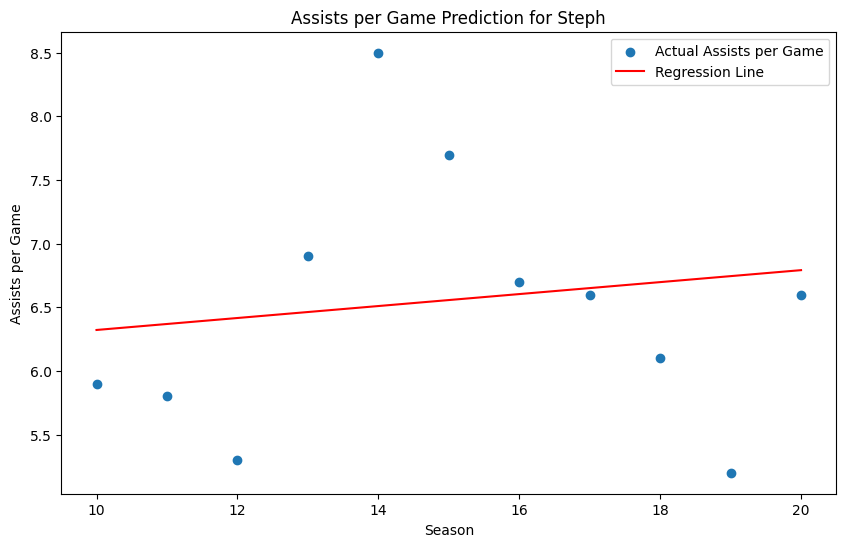

In [5]:
# Running the functions for different players
create_plots('lebron', 'jamesle01')
create_plots('kobe', 'bryanko01')
# create_plots('jordan', 'jordami01')

create_plots('Steph', 'curryst01')

